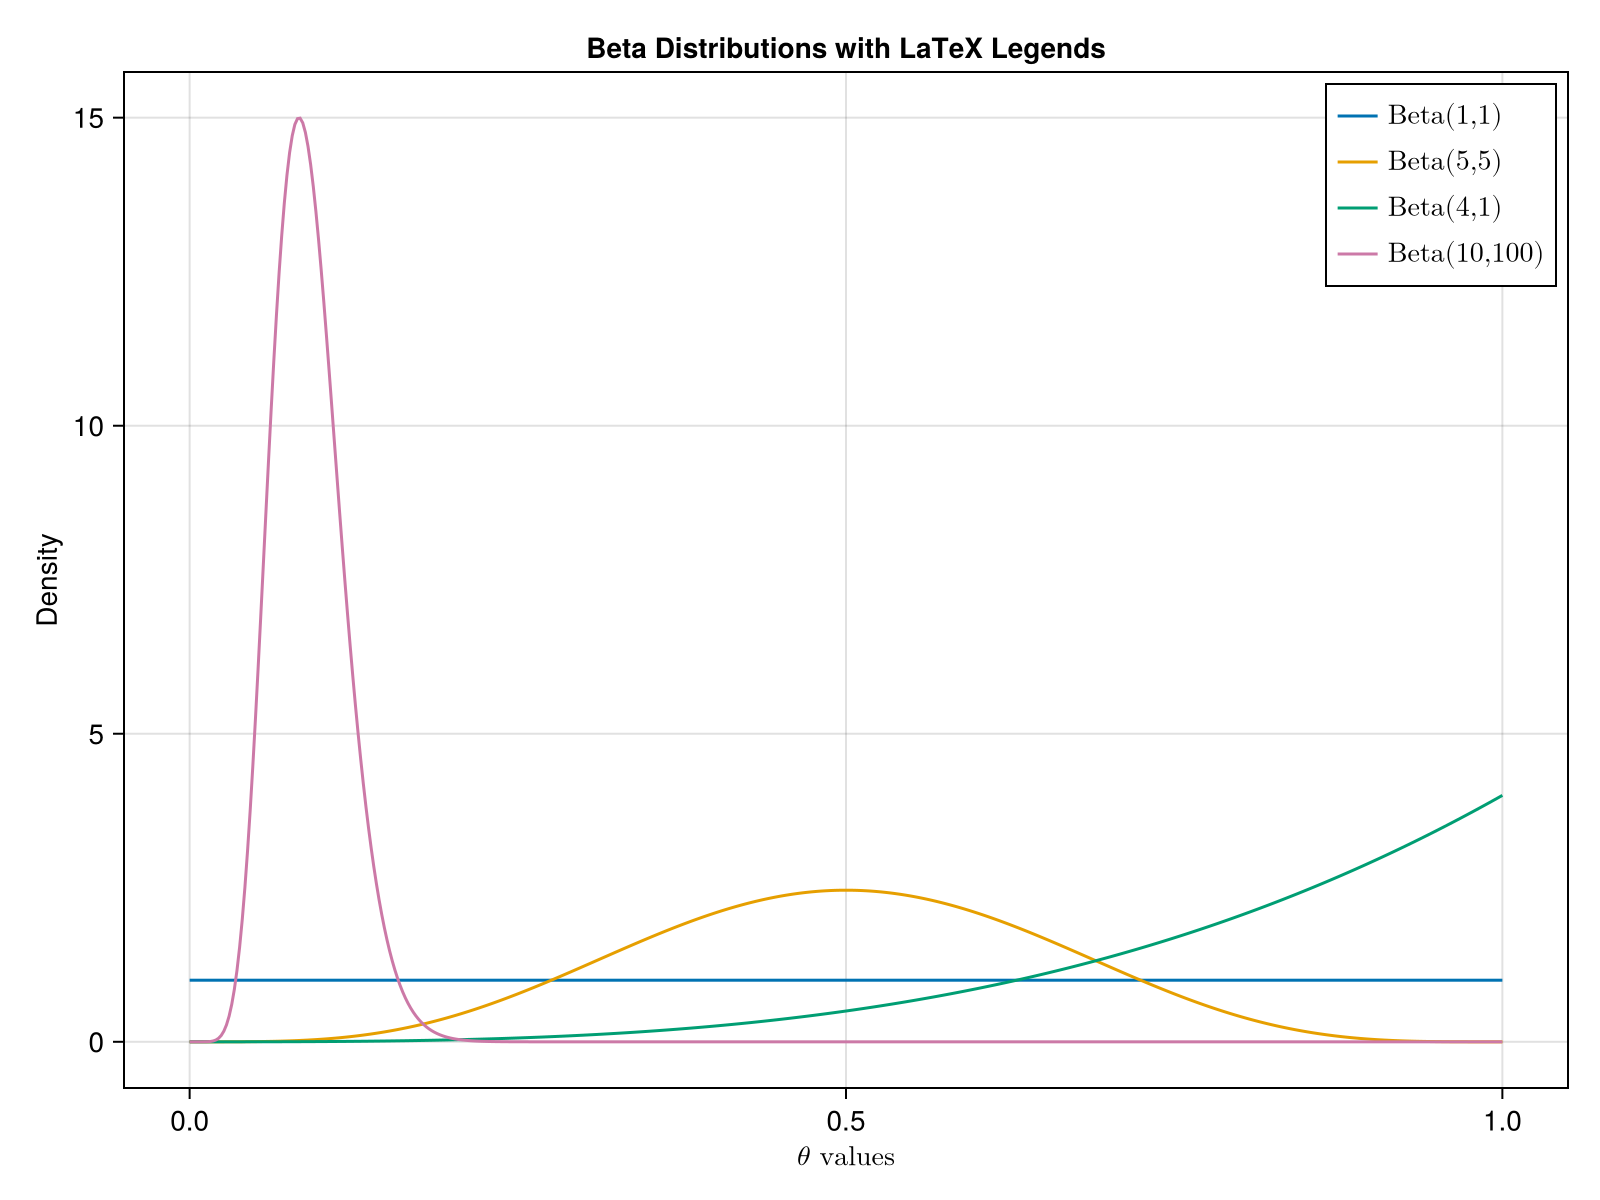

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/pFPBw/src/scenes.jl:238


CairoMakie.Screen{IMAGE}


In [74]:
using CairoMakie
using Distributions  # For Beta distributions
using LaTeXStrings   # For LaTeX-style legends

# Define Beta distributions with given parameters
beta_distributions = [
    (1, 1),   # Uniform distribution
    (5, 5),   # Symmetric Beta
    (4, 1),   # Skewed to the right
    (10, 100) # Highly skewed
]

# Generate θ values (range of x-axis)
θ_values = range(0, 1, length=500)

# Plot multiple Beta densities with LaTeX legends
function plot_multiple_beta_latex(beta_params, θ_values)
    fig = Figure(resolution = (800, 600))
    ax = Axis(fig[1, 1],
              title = "Beta Distributions with LaTeX Legends",
              xlabel = L"\theta \text{ values}",
              ylabel = "Density")

    # Add each Beta distribution to the plot with LaTeX legend
    for (α, β) in beta_params
        beta_dist = Beta(α, β)
        label_text = L"\mathrm{Beta}(%$α, %$β)"
        lines!(ax, θ_values, pdf.(beta_dist, θ_values), 
               label = label_text)
    end

    axislegend(ax, position=:rt)  # Add legend
    fig
end

# Create and display the plot
fig = plot_multiple_beta_latex(beta_distributions, θ_values)
display(fig)


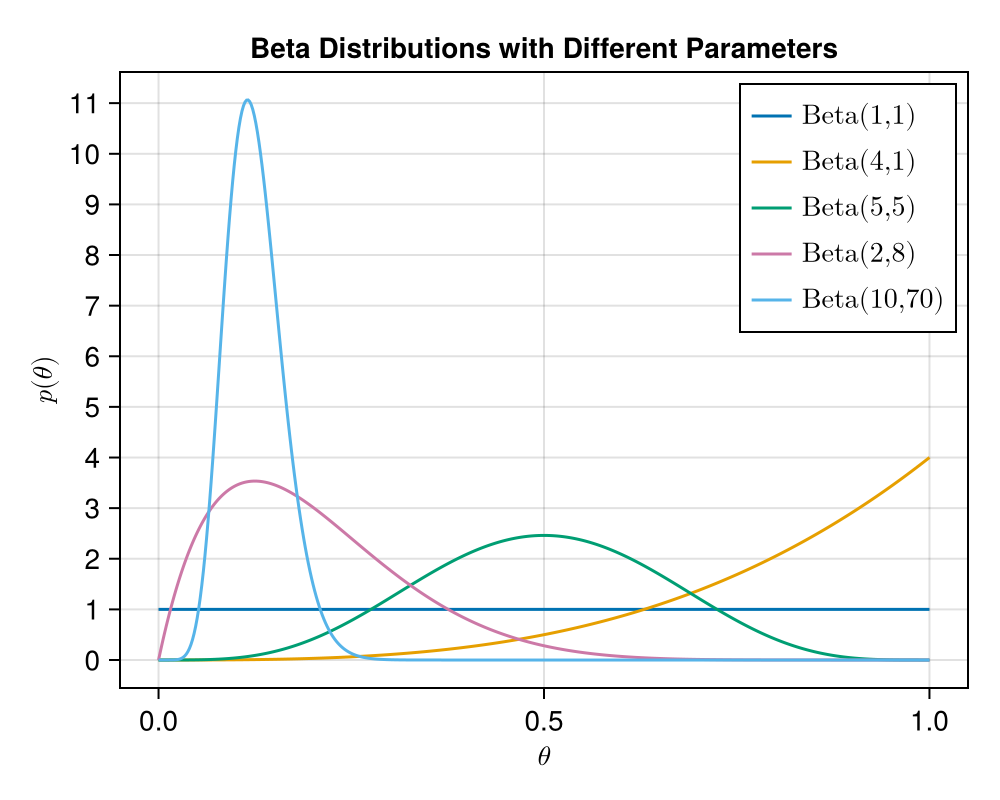

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/pFPBw/src/scenes.jl:238


CairoMakie.Screen{IMAGE}


In [116]:
using CairoMakie
using Distributions  # For Beta distributions
using LaTeXStrings   # For LaTeX-style legends

# Define Beta distributions with given parameters
beta_distributions = [
    (1, 1),   # Uniform distribution
    (4, 1),   # Skewed to the right
    (5, 5),   # Symmetric Beta
    (2, 8),   # Symmetric Beta
    (10, 70) # Highly skewed
]

# Generate θ values (range of x-axis)
θ_values = range(0, 1, length=500)

# Plot multiple Beta densities
function plot_multiple_beta_densities(beta_params, θ_values)
    fig = Figure(resolution = (500, 400))
    ax = Axis(fig[1, 1],
              title = "Beta Distributions with Different Parameters",
              xlabel = L"\theta",
              ylabel = L"p(\theta)")

    # Add each Beta distribution to the plot
    for (alpha, beta) in beta_params
        beta_dist = Beta(alpha, beta)
        lines!(ax, θ_values, pdf.(beta_dist, θ_values), 
               label = L"\mathrm{Beta}(%$alpha, %$beta)")
    end
    ax.yticks = 0:1:100  # Set y-axis ticks to explicitly show 1
    
    axislegend(ax, position=:rt)  # Add legend
    fig
end

# Create and display the plot
fig = plot_multiple_beta_densities(beta_distributions, θ_values)
display(fig)
save("beta_distributions.png", fig)


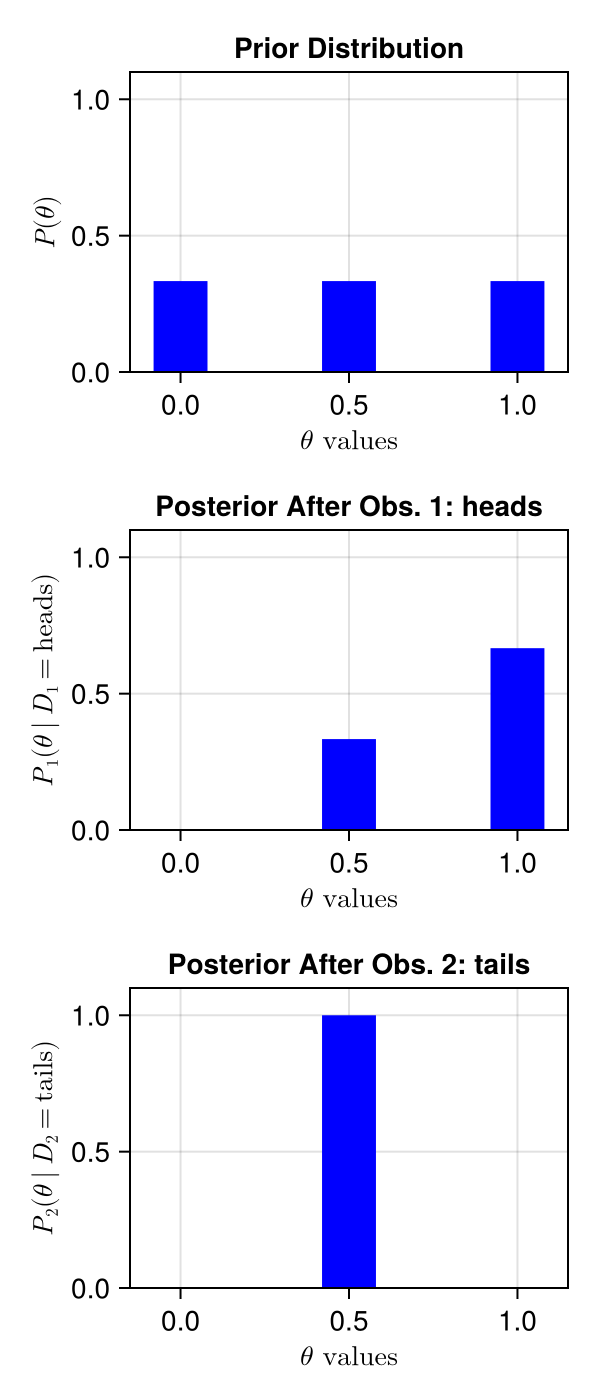

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/pFPBw/src/scenes.jl:238


CairoMakie.Screen{IMAGE}


In [167]:
using CairoMakie

# Define the fairness parameter θ and initialize prior
θ_values = [0.0, 0.5, 1.0]  # Discrete values for θ
prior = [1/3, 1/3, 1/3]     # Uniform prior P(θ)

# Function to perform Bayesian update
function bayesian_update(prior, θ_values, outcome)
    likelihood = outcome == "heads" ? θ_values : 1 .- θ_values
    unnormalized_posterior = likelihood .* prior
    posterior = unnormalized_posterior ./ sum(unnormalized_posterior)
    return posterior
end

# Define the sequence of observations
observations = ["heads", "tails"]

# Store posteriors for each step
posteriors = [prior]

for obs in observations
    posterior = bayesian_update(posteriors[end], θ_values, obs)
    push!(posteriors, posterior)
end

# Plot the results with prior at the top
function plot_posteriors_corrected(posteriors, θ_values, observations)
    num_plots = length(posteriors)  # Prior + number of observations
    fig = Figure(resolution = (300, 700))
    
    # Plot the prior first
    ax_prior = Axis(fig[1, 1], 
                    title = "Prior Distribution", 
                    xlabel = L"\theta \text{ values}",
                    ylabel = L"P(\theta)",
                    limits = (-0.15, 1.15, -0, 1.1))  # Set y-axis to 0-1
    barplot!(ax_prior, θ_values, posteriors[1], width = 0.2, color = :blue, label = "Prior")
    
    # Plot posteriors in order
    for t in 1:length(observations)
        ax = Axis(fig[t+1, 1], 
                  title = "Posterior After Obs. $t: $(observations[t])", 
                  xlabel = L"\theta \text{ values}",
                  ylabel = L"P_%$t(\theta \mid D_%$t = \text{%$(observations[t])})",
                  limits = (-0.15, 1.15, 0, 1.1))  # Set y-axis to 0-1
        barplot!(ax, θ_values, posteriors[t+1], width = 0.2, color = :blue, label = "Observation $(t)")

    end
        

    fig
end

# Display the subplots
fig = plot_posteriors_corrected(posteriors, θ_values, observations)
display(fig)



In [118]:
save("posterior_plot.png", fig)


CairoMakie.Screen{IMAGE}


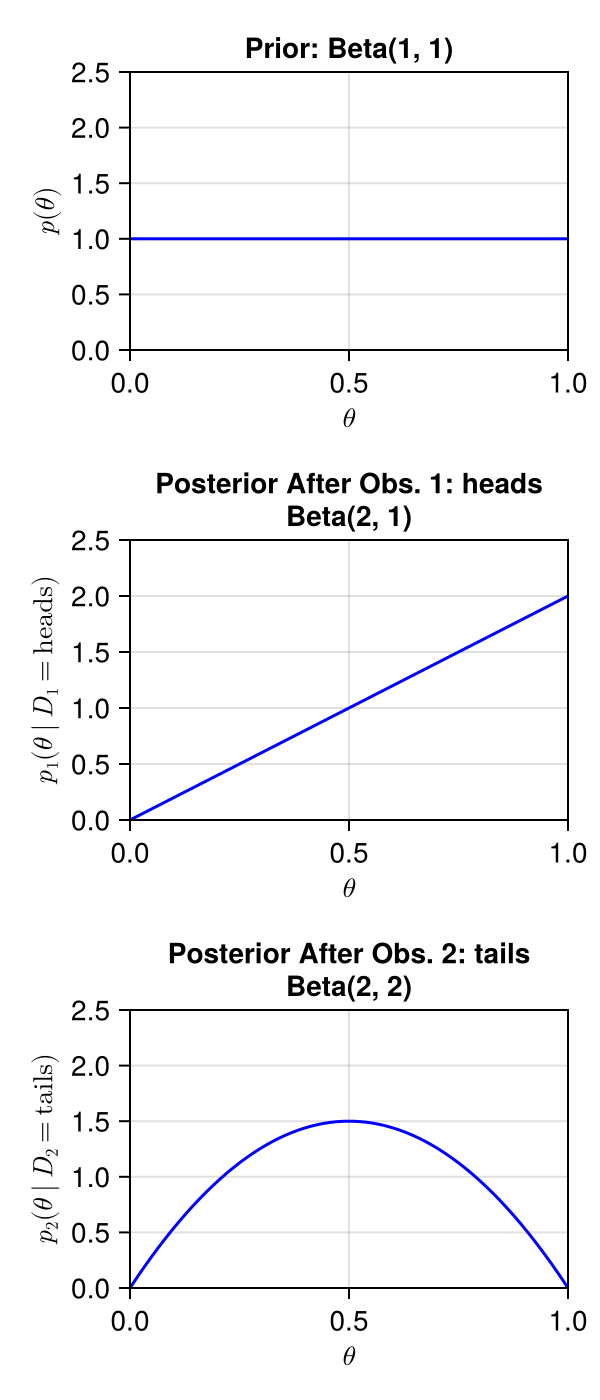

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/pFPBw/src/scenes.jl:238


CairoMakie.Screen{IMAGE}


In [119]:
using CairoMakie
using Distributions  # For Beta distribution

# Function to calculate posterior Beta distribution parameters
function beta_update(alpha_prior, beta_prior, observations)
    # Count heads and tails in the observations
    heads = count(x -> x == "heads", observations)
    tails = count(x -> x == "tails", observations)
    # Update Beta parameters
    alpha_post = alpha_prior + heads
    beta_post = beta_prior + tails
    return alpha_post, beta_post
end

# Function to plot prior and posterior Beta distributions
function plot_beta_distributions(alpha_prior, beta_prior, observations)
    num_plots = length(observations) + 1  # Prior + number of observations
    θ_values = range(0, 1, length=500)  # Continuous range for θ

    # Initialize figure
    fig = Figure(resolution = (300, 700))

    # Plot the prior Beta distribution
    ax_prior = Axis(fig[1, 1],
                    title = "Prior: Beta($alpha_prior, $beta_prior)",
                    xlabel = L"\theta",
                    ylabel = L"p(\theta)",
                    limits = (0, 1, 0, 2.5))
    beta_prior_dist = Beta(alpha_prior, beta_prior)
    lines!(ax_prior, θ_values, pdf.(beta_prior_dist, θ_values), color = :blue, label = "Prior")

    # Sequentially update and plot posteriors
    current_alpha, current_beta = alpha_prior, beta_prior
    for t in 1:length(observations)
        # Update Beta parameters
        current_alpha, current_beta = beta_update(alpha_prior, beta_prior, observations[1:t])

        # Plot posterior Beta distribution
        ax = Axis(fig[t+1, 1],
                  title = "Posterior After Obs. $t: $(observations[t])\nBeta($current_alpha, $current_beta)",
                  xlabel = L"\theta",
                  ylabel = L"p_%$t(\theta \mid D_%$t = \text{%$(observations[t])})",
                  limits = (0, 1, 0, 2.5))
        beta_post_dist = Beta(current_alpha, current_beta)
        lines!(ax, θ_values, pdf.(beta_post_dist, θ_values), color = :blue, label = "Posterior")
    end

    return fig
end

# Initial Beta prior parameters
alpha_prior = 1  # Uniform prior Beta(1, 1)
beta_prior = 1

# Define the sequence of observations
observations = ["heads", "tails"]

# Plot prior and posteriors
fig = plot_beta_distributions(alpha_prior, beta_prior, observations)
display(fig)


In [120]:
save("beta_posteriors.png", fig)


CairoMakie.Screen{IMAGE}


In [175]:
using Distributions
Dirichlet([1,1,3])

Dirichlet{Int64, Vector{Int64}, Float64}(alpha=[1, 1, 3])

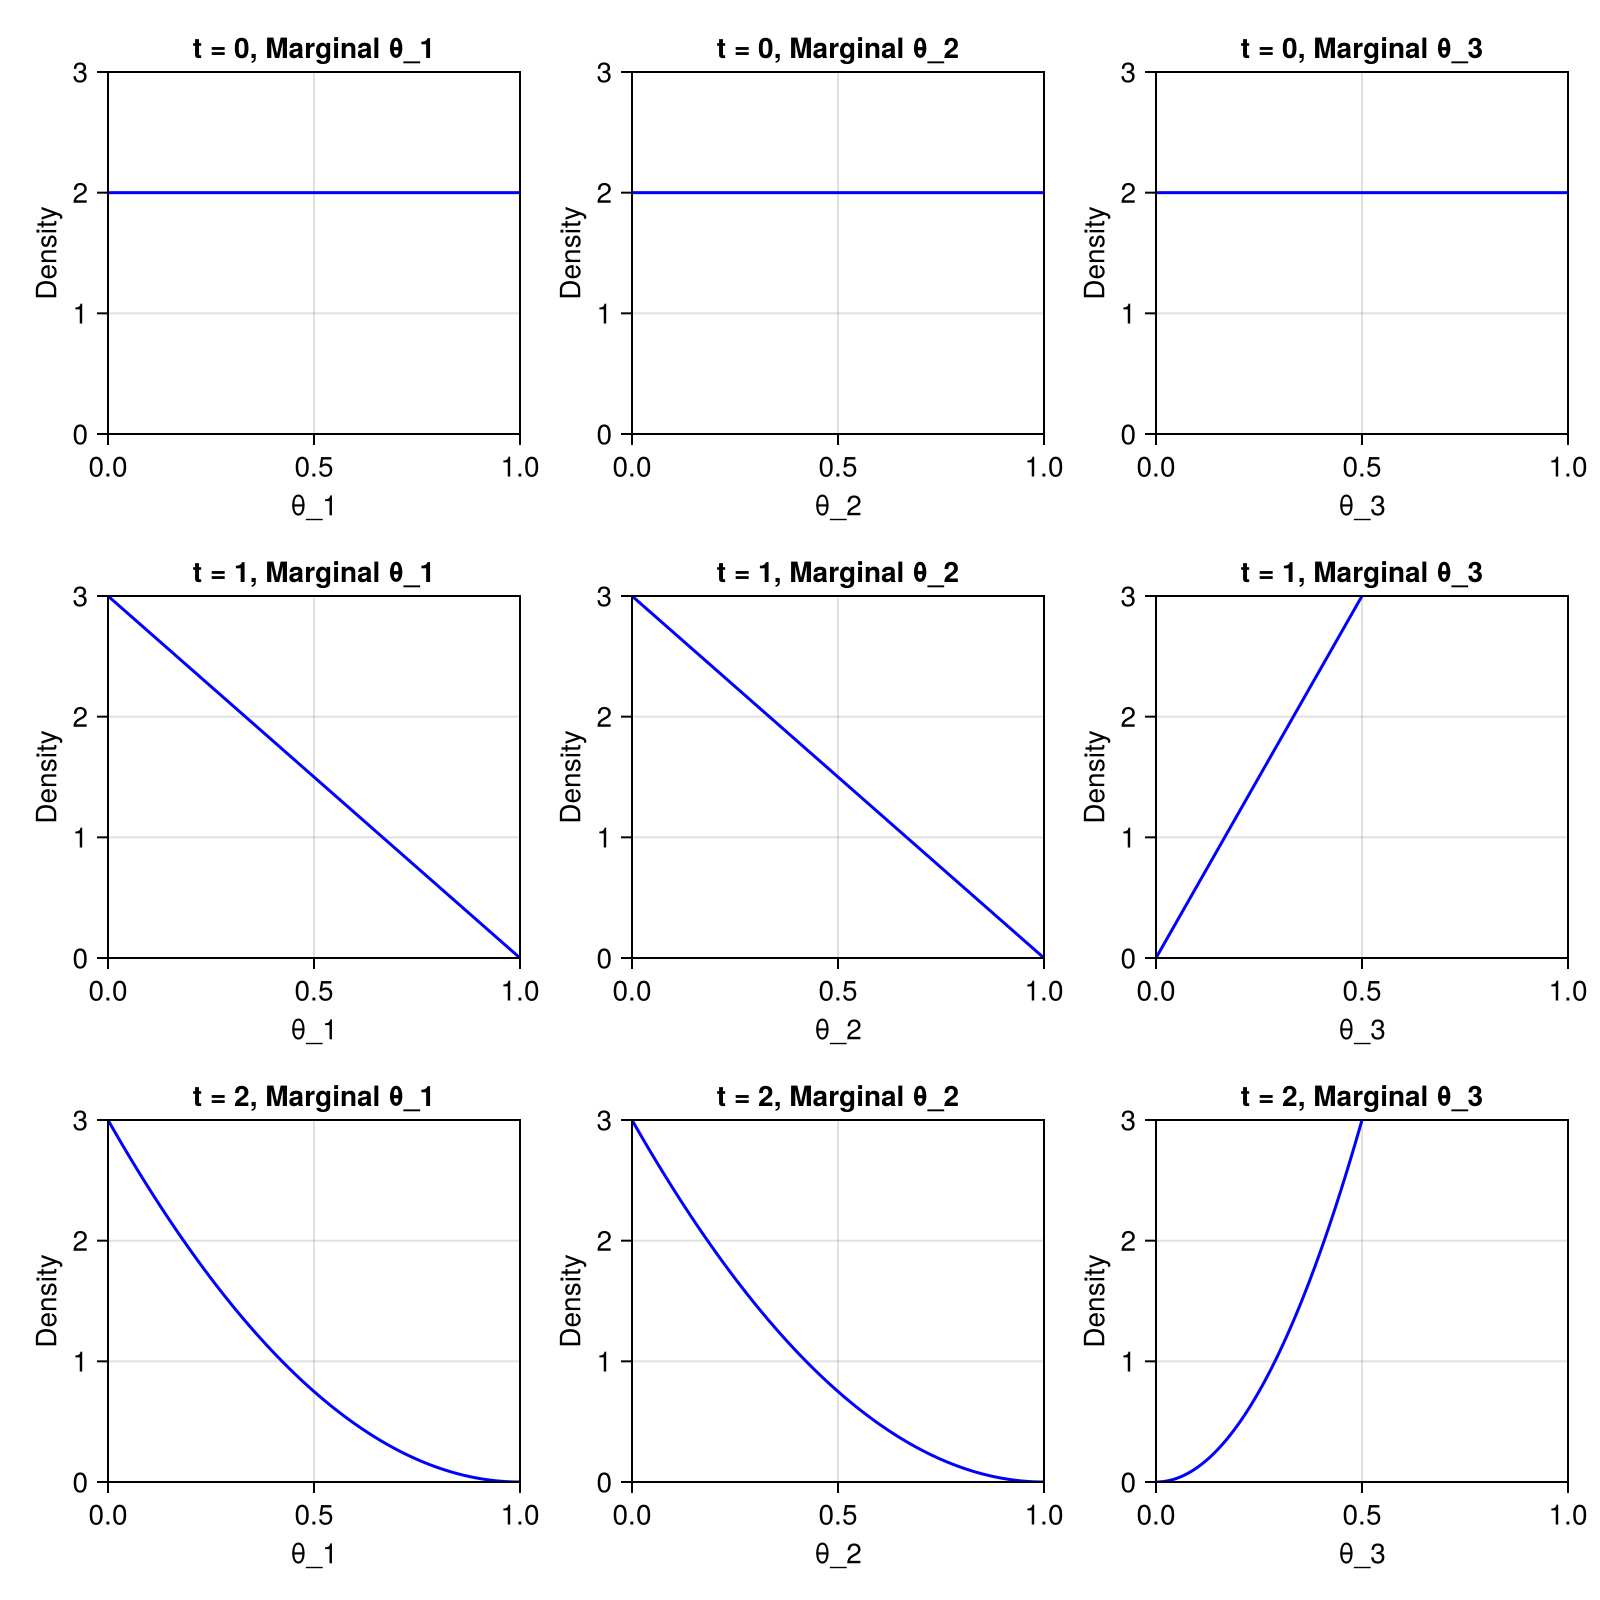

CairoMakie.Screen{IMAGE}


In [179]:
using CairoMakie
using Distributions

# Define Dirichlet parameters at each time step
alphas = [
    [1, 1, 1],   # t = 0
    [1, 1, 2],   # t = 1
    [1, 1, 3]    # t = 2
]

# Generate the theta grid for plotting
θ_values = range(0, 1, length=200)

# Function to compute marginal PDFs for each parameter
function dirichlet_marginals(α, θ_values)
    dist = Dirichlet(α)
    marginals = []
    for i in 1:length(α)
        # PDF of θ_i marginalized over the others
        marginal = [pdf(dist, [if j == i
                                    θ
                                else
                                    (1 - θ) / (length(α) - 1)
                                end for j in 1:length(α)]) for θ in θ_values]
        push!(marginals, marginal)
    end
    return marginals
end

# Plot the Dirichlet distributions for each parameter
function plot_dirichlet_marginals(alphas, θ_values)
    fig = Figure(size=(800, 800))
    
    for (t, α) in enumerate(alphas)
        marginals = dirichlet_marginals(α, θ_values)
        for i in 1:length(α)
            # Create subplots for each θ_i
            ax = Axis(fig[t, i], 
                      title = "t = $(t-1), Marginal θ_$(i)",
                      xlabel = "θ_$(i)",
                      ylabel = "Density",
                      limits = (0, 1, 0, 3))
            lines!(ax, θ_values, marginals[i], color=:blue, label="α[$i] = $(α[i])")
        end
    end
    
    fig
end

# Plot and display
fig = plot_dirichlet_marginals(alphas, θ_values)
display(fig)


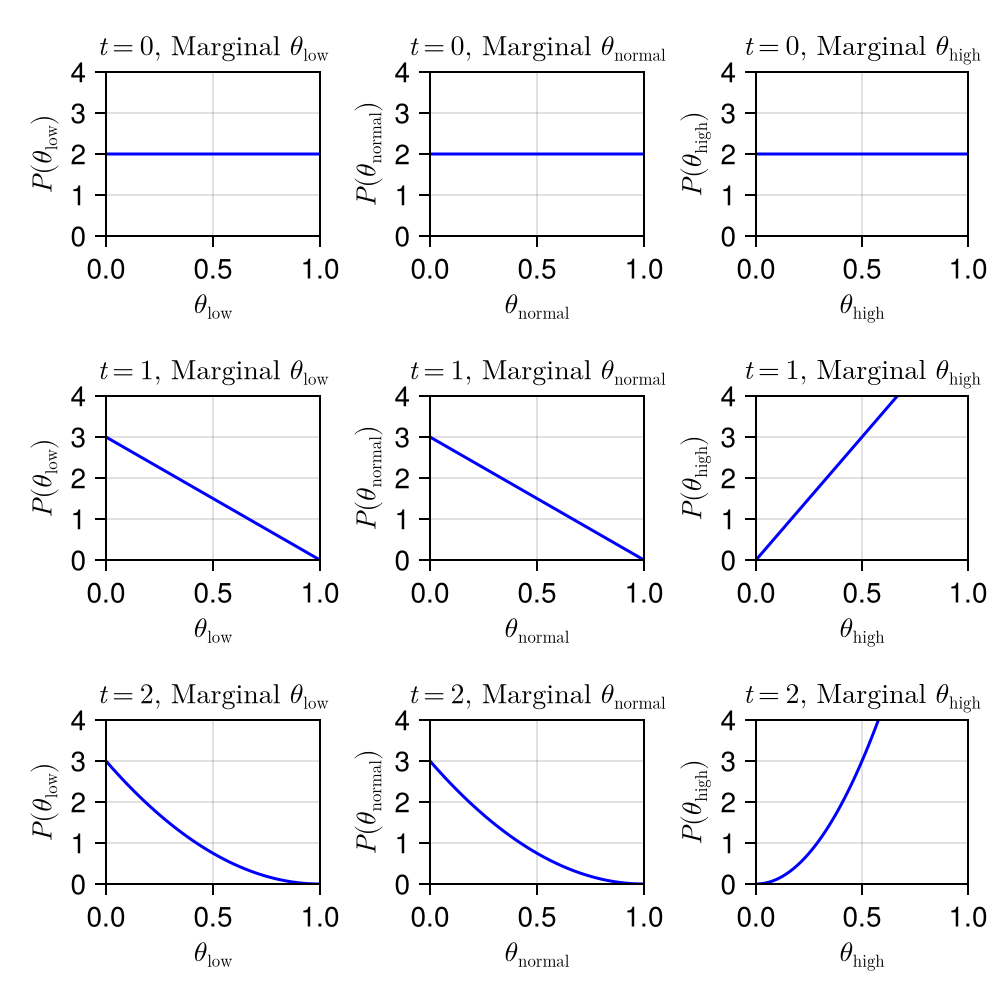

CairoMakie.Screen{IMAGE}


In [216]:
using CairoMakie
using Distributions
using LaTeXStrings  # For LaTeX-style labels

# Define Dirichlet parameters at each time step
alphas = [
    [1, 1, 1],   # t = 0
    [1, 1, 2],   # t = 1
    [1, 1, 3]    # t = 2
]

# Generate the theta grid for plotting
θ_values = range(0, 1, length=200)

# Function to compute marginal PDFs for each parameter
function dirichlet_marginals(α, θ_values)
    dist = Dirichlet(α)
    marginals = []
    for i in 1:length(α)
        # PDF of θ_i marginalized over the others
        marginal = [pdf(dist, [if j == i
                                    θ
                                else
                                    (1 - θ) / (length(α) - 1)
                                end for j in 1:length(α)]) for θ in θ_values]
        push!(marginals, marginal)
    end
    return marginals
end

# Plot the Dirichlet distributions for each parameter
function plot_dirichlet_marginals(alphas, θ_values)
    fig = Figure(size=(500, 500))  # Increased size for better layout
    
    for (t, α) in enumerate(alphas)
        marginals = dirichlet_marginals(α, θ_values)
        for (i, name) in enumerate(["low", "normal", "high"])
            # Create subplots for each θ_i
            ax = Axis(fig[t, i], 
                      title = L"t = %$(t-1), \text{ Marginal } \theta_{\text{%$name}}",
                      xlabel = L"\theta_{\text{%$name}}",
                      ylabel = L"P(\theta_{\text{%$name}})",
                        limits = (0, 1, 0, 4)  # Allow y-axis to go beyond 3
                      )
            
            # Plot the marginal densities
            lines!(ax, θ_values, marginals[i], color=:blue, label=L"\alpha_{%$i} = %$(α[i])")
            # axislegend(ax, position=:rt)
        end
    end

    fig
end

# Plot and display
fig = plot_dirichlet_marginals(alphas, θ_values)
display(fig)


In [217]:
save("dirichlet_marginals.png", fig)

CairoMakie.Screen{IMAGE}


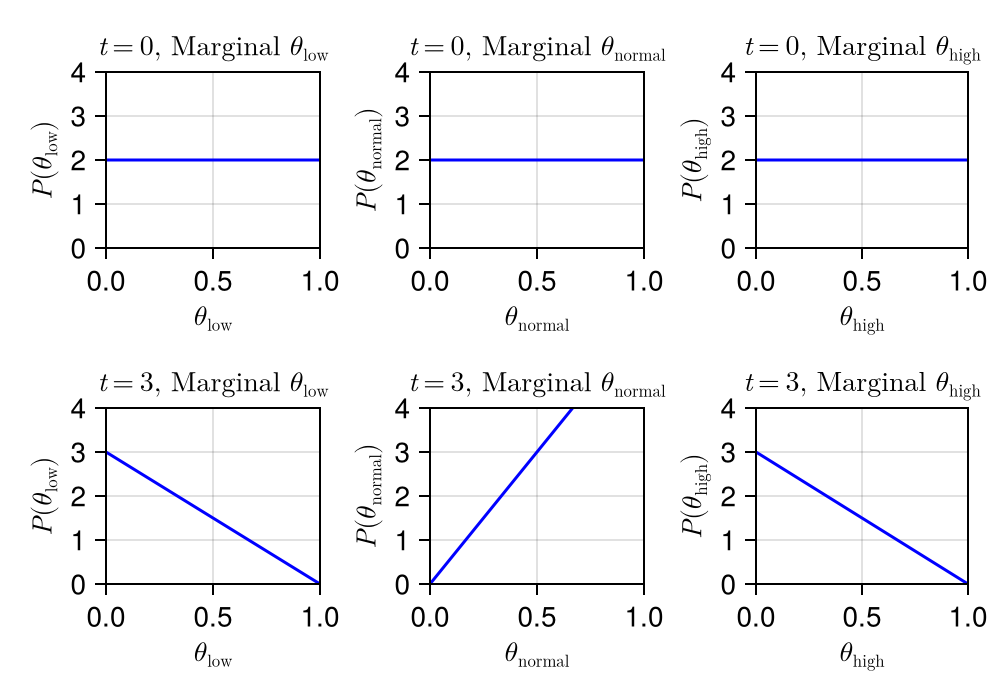

CairoMakie.Screen{IMAGE}


In [218]:
using CairoMakie
using Distributions
using LaTeXStrings  # For LaTeX-style labels

# Define Dirichlet parameters at each time step
alphas = [
    [1, 1, 1],   # t = 0
    [1, 2, 1],   # t = 1
    # [1, 1, 3]    # t = 2
]

# Generate the theta grid for plotting
θ_values = range(0, 1, length=200)

# Function to compute marginal PDFs for each parameter
function dirichlet_marginals(α, θ_values)
    dist = Dirichlet(α)
    marginals = []
    for i in 1:length(α)
        # PDF of θ_i marginalized over the others
        marginal = [pdf(dist, [if j == i
                                    θ
                                else
                                    (1 - θ) / (length(α) - 1)
                                end for j in 1:length(α)]) for θ in θ_values]
        push!(marginals, marginal)
    end
    return marginals
end

# Plot the Dirichlet distributions for each parameter
function plot_dirichlet_marginals(alphas, θ_values)
    fig = Figure(size=(500, 350))  # Increased size for better layout
    
    for (time, α) in enumerate(alphas)
        t = [0, 3][time]
        marginals = dirichlet_marginals(α, θ_values)
        for (i, name) in enumerate(["low", "normal", "high"])
            # Create subplots for each θ_i
            ax = Axis(fig[time, i], 
                      title = L"t = %$(t), \text{ Marginal } \theta_{\text{%$name}}",
                      xlabel = L"\theta_{\text{%$name}}",
                      ylabel = L"P(\theta_{\text{%$name}})",
                      limits = (0, 1, 0, 4))  # Allow y-axis to go beyond 3
            
            # Plot the marginal densities
            lines!(ax, θ_values, marginals[i], color=:blue, label=L"\alpha_{%$i} = %$(α[i])")
            # axislegend(ax, position=:rt)
        end
    end

    fig
end

# Plot and display
fig = plot_dirichlet_marginals(alphas, θ_values)
display(fig)


In [219]:
save("dirichlet_marginals_abx.png", fig)

CairoMakie.Screen{IMAGE}
